In [3]:
import qsharp
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from utils import get_p_chapeau, get_phi_chapeau, get_precision, n_run

Puissance de l'oracle fixe et nombre de shot varie

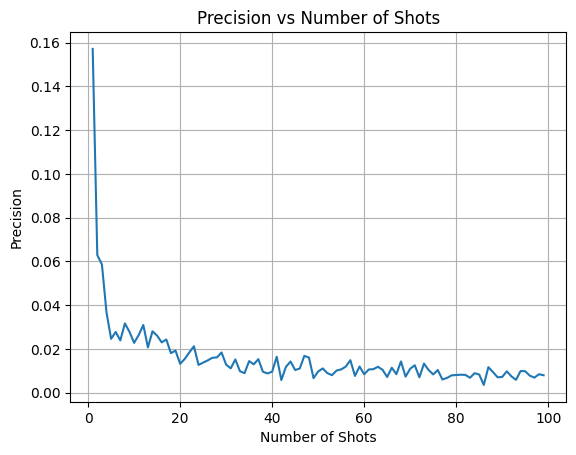

In [8]:
phi = 0
n_oracle = 10
shot_result = []
shots = []
for nb_shots in range(1, 100, 1):
    result = n_run(nShots=nb_shots, phi=phi, oraclePower=n_oracle, nb_run=10)
    shot_result.append(result)
    shots.append(nb_shots)

plt.plot(shots, shot_result)
plt.xlabel('Number of Shots')
plt.ylabel('Precision')
plt.title('Precision vs Number of Shots')
plt.grid(True)
plt.show()

Nombre de tentative fixe et puissance de l'oracle varie

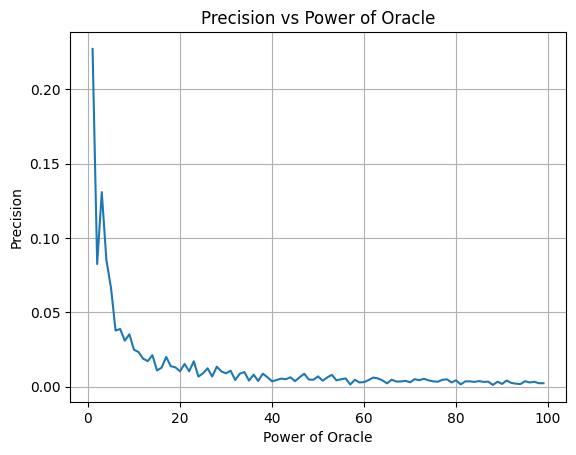

In [5]:
n_shots = 10
phi = 0
oracle_result = []
oracles = []
for nb_oracles in range(1, 100, 1):
    result = n_run(nShots=n_shots, phi=phi, oraclePower=nb_oracles, nb_run=10)
    oracle_result.append(result)
    oracles.append(nb_oracles)

plt.plot(oracles, oracle_result)
plt.xlabel('Power of Oracle')
plt.ylabel('Precision')
plt.title('Precision vs Power of Oracle')
plt.grid(True)
plt.show()

Régression linéaire

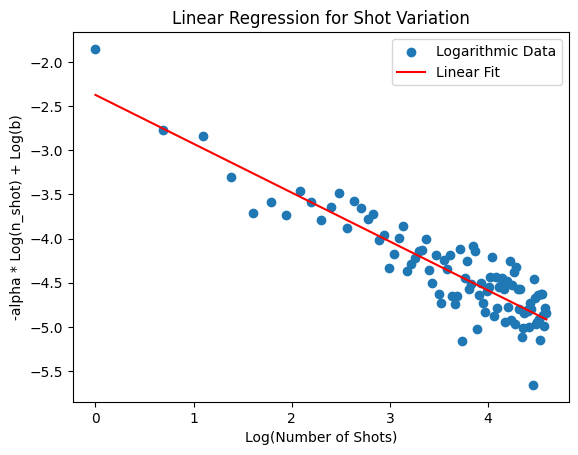

Alpha = -0.5535332951430109


In [9]:
shots_array = np.array(shots)
precision_array = np.array(shot_result)

# Application de ln
log_shots = np.log(shots_array)
log_precision = np.log(precision_array)

# Régression linéaire sur les données ln
slope, intercept, r_value, p_value, std_err = linregress(log_shots, log_precision)

# Affichage
plt.scatter(log_shots, log_precision, label='Logarithmic Data')
plt.plot(log_shots, intercept + slope * log_shots, label='Linear Fit', color='red')
plt.xlabel('Log(Number of Shots)')
plt.ylabel('-alpha * Log(n_shot) + Log(b)')
plt.title('Linear Regression for Shot Variation')
plt.legend()
plt.show()

# Coefficient alpha
print("Alpha =", slope)

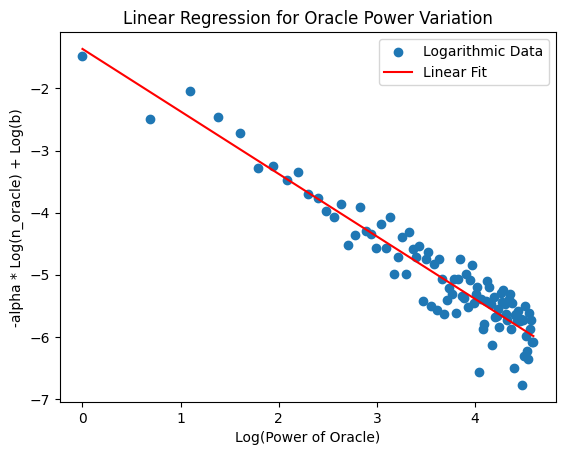

Alpha = -1.0060026244735203


In [7]:
shots_array = np.array(oracles)
precision_array = np.array(oracle_result)

# # Application de ln
log_shots = np.log(shots_array)
log_precision = np.log(precision_array)

# Régression linéaire sur les données ln
slope, intercept, r_value, p_value, std_err = linregress(log_shots, log_precision)

# Affichage
plt.scatter(log_shots, log_precision, label='Logarithmic Data')
plt.plot(log_shots, intercept + slope * log_shots, label='Linear Fit', color='red')
plt.xlabel('Log(Power of Oracle)')
plt.ylabel('-alpha * Log(n_oracle) + Log(b)')
plt.title('Linear Regression for Oracle Power Variation')
plt.legend()
plt.show()

# Coefficient alpha
print("Alpha =", slope)